In [1]:
import tensorflow as tf
import autokeras as ak


Using TensorFlow backend


### Load MNIST dataset


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training image shape:", x_train.shape)  # (60000, 28, 28)
print("Training label shape:", y_train.shape)  # (60000,)
print("First five training labels:", y_train[:5])  # array([5 0 4 1 9], dtype=uint8)


11490434/11490434 [==============================] - 0s 0us/step
Training image shape: (60000, 28, 28)
Training label shape: (60000,)
First five training labels: [5 0 4 1 9]


### Run the ImageClassifier


In [3]:
from kerastuner.engine import hyperparameters as hp


input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ConvBlock(
    num_blocks=2, max_pooling=True, separable=False, dropout=0.0
)(output_node)
output_node = ak.ClassificationHead(dropout=0.0)(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=10, overwrite=True, seed=42
)

# Use the first 100 training samples as a quick demo.
# You may run with the full dataset, but expect a longer training time.
auto_model.fit(x_train[:100], y_train[:100], epochs=3)
test_loss, test_acc = auto_model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy: ", test_acc)


Trial 10 Complete [00h 00m 05s]
val_loss: 2.3867013454437256

Best val_loss So Far: 1.6118943691253662
Total elapsed time: 00h 00m 52s
Epoch 1/3
4/4 [==============================] - 1s 165ms/step - loss: 2.2196 - accuracy: 0.1900
Epoch 2/3
4/4 [==============================] - 1s 173ms/step - loss: 1.7400 - accuracy: 0.5700
Epoch 3/3
4/4 [==============================] - 1s 166ms/step - loss: 1.2549 - accuracy: 0.7100


Test accuracy:  0.6176000237464905


### Get the summarized results during the tuning process (return the best 10 models if
existed)


In [4]:
auto_model.tuner.results_summary(1)


Results summary
Results in ./auto_model
Showing 1 best trials
Trial summary
Hyperparameters:
conv_block_1/kernel_size: 3
conv_block_1/num_layers: 1
conv_block_1/filters_0_0: 512
conv_block_1/filters_0_1: 256
conv_block_1/filters_1_0: 32
conv_block_1/filters_1_1: 256
classification_head_1/spatial_reduction_1/reduction_type: flatten
optimizer: adam
learning_rate: 0.001
Score: 1.6118943691253662


### Retrieve & Display best model


In [5]:
best_model = auto_model.export_model()
best_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 512)       5120      
                                                             

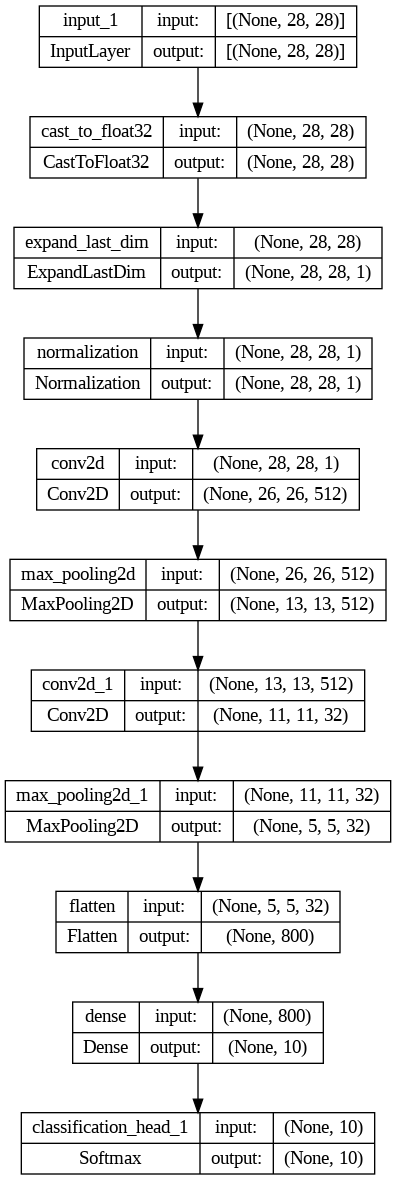

In [6]:
tf.keras.utils.plot_model(best_model, show_shapes=True, expand_nested=True)


### Predict with the best model.


In [7]:
predicted_y = auto_model.predict(x_test)
print(predicted_y)


313/313 [==============================] - 17s 53ms/step
[['7']
 ['3']
 ['1']
 ...
 ['9']
 ['7']
 ['6']]
